# Лабораторная работа №3. Применение однослойной нейронной сети с линейной функцией активации для прогнозирования временных рядов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
def simulated_function(t):
    return 0.4 * np.sin(0.3 * t) + 0.5

## Рассмотрим для начала размер окна p = 4

In [3]:
start = -4
stop = 4
points_number = 20
p = 4

### Готовим обучающую выборку

In [4]:
t = np.linspace(start, stop, points_number, endpoint=True) # равномерно распределенные на отрезке [start, stop] значения t
x = simulated_function(t) # points_number значений нашего временного ряда

In [5]:
x

array([0.12718437, 0.14841463, 0.17524722, 0.20725458, 0.24392668,
       0.28467918, 0.3288627 , 0.3757732 , 0.42466319, 0.47475363,
       0.52524637, 0.57533681, 0.6242268 , 0.6711373 , 0.71532082,
       0.75607332, 0.79274542, 0.82475278, 0.85158537, 0.87281563])

### График обучающей выборки

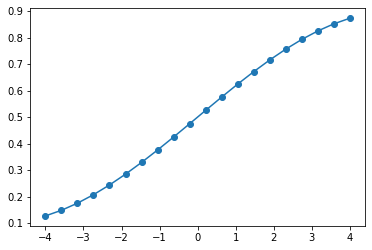

In [6]:
plt.plot(t, x)
plt.plot(t, x, 'o', color='tab:blue')

### Все возможные "скользящие окна"

In [7]:
X_sliding_windows = np.array([[x[j] for j in range(i, i + p)] for i in range(points_number - p)])

In [8]:
X_sliding_windows[0], X_sliding_windows[-1]

(array([0.12718437, 0.14841463, 0.17524722, 0.20725458]),
 array([0.75607332, 0.79274542, 0.82475278, 0.85158537]))

### Правильные ответы для каждого набора иксов

In [9]:
X_true = np.array([x[i] for i in range(p, points_number)])

In [10]:
X_true

array([0.24392668, 0.28467918, 0.3288627 , 0.3757732 , 0.42466319,
       0.47475363, 0.52524637, 0.57533681, 0.6242268 , 0.6711373 ,
       0.71532082, 0.75607332, 0.79274542, 0.82475278, 0.85158537,
       0.87281563])

In [11]:
len(X_sliding_windows), len(X_true)

(16, 16)

### Готовим тестовую выборку

In [12]:
t_test = np.linspace(stop, 12, points_number, endpoint=True)[1:]
x_test = simulated_function(t_test)

### График тестовой выборки

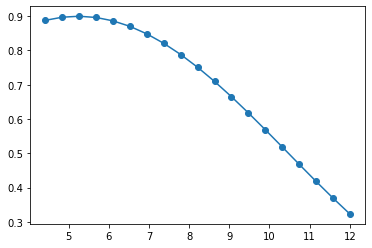

In [13]:
plt.plot(t_test, x_test)
plt.plot(t_test, x_test, 'o', color='tab:blue')

### Обучающая и тестовая выборки на одном графике

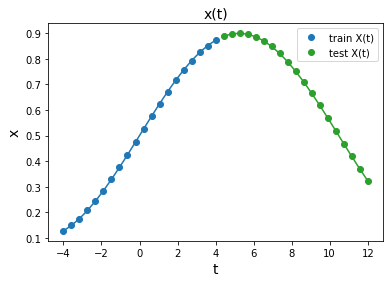

In [14]:
fig, ax = plt.subplots()
plt.plot(t, x, 'o', color='tab:blue')
plt.plot(t_test, x_test, 'o', color='tab:green')
plt.plot(t, x, color='tab:blue')
plt.plot(t_test, x_test, color='tab:green')
ax.legend(['train X(t)', 'test X(t)'])
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('x', fontsize=14)
ax.set_title('x(t)', fontsize=14)
plt.show()

### Функции, нужные для обучения и получения предсказания

In [15]:
def get_delta(x_true, x_predicted):
    return x_true - x_predicted

In [16]:
def predict(net, x, number_of_predictions):
    x_test = x[points_number - p:points_number]
    predict = []
    for i in range(number_of_predictions):
        x_next = net.forward(x_test)
        predict.append(x_next)
        x_test = np.append(x_test[1:], x_next)
    return np.array(predict)

In [17]:
def show_predict(net, t_test, x_test, x):
    x_predicted = predict(net, x, len(t_test))
    fig, ax = plt.subplots()
    ax.plot(t_test, x_test, color = 'tab:pink')
    ax.plot(t_test, x_predicted, 'o', color = 'xkcd:sky blue')
    ax.set_xlabel('t', fontsize=14)
    ax.set_ylabel('x', fontsize=14)
    ax.set_title('x(t)', fontsize=14)
    ax.legend(['true X(t)', 'predicted X(t)'])

### Нейросеть

In [18]:
class Net:
    
    def __init__(self, neurons_number, seed=1):
        np.random.seed(seed)
        self.W = np.zeros(shape=neurons_number)
        self.b = 0
#         self.W = np.random.normal(scale=0.1, size=4)
#         self.b = np.random.randint(1)
    
    def forward(self, x):
        self.x = x
        self.net = np.dot(self.W, x) + self.b
        return self.net
    
    def backward(self, delta, lr=0.01):
        self.dW = np.dot(lr * delta, self.x)
        self.db = lr * delta
        self.W = self.W + self.dW
        self.b = self.b + self.db

### Функция обучения нейросети

In [19]:
def train_neural_network(X_sliding_windows, X_true, neurons_number, epoch_number, lr):
    net = Net(neurons_number)
    L_iter = []
    for epoch in range(epoch_number):
        error = 0
        Y_predicted = []
        for i in range(len(X_sliding_windows)):
            x_train = X_sliding_windows[i]
            y_true = X_true[i]
            y_predicted = net.forward(x_train)
            delta = get_delta(y_true, y_predicted)
            error += delta ** 2
            net.backward(delta, lr)
            Y_predicted.append(y_predicted)
        L_iter.append(sqrt(error))

        if (error == 0):
            break
    print('epsilon =', L_iter[-1])
    fig, ax = plt.subplots()
    ax.plot(list(range(epoch_number)), L_iter)
    ax.set_xlabel('epoch number')
    ax.set_ylabel('error')
    ax.set_title('Error(epoch)')
    return net

### 1. Обучаем нейросеть. 3000 эпох, норма обучения 0.3

epsilon = 0.004300574847085467


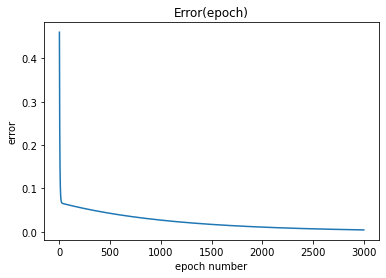

In [20]:
net1 = train_neural_network(X_sliding_windows, X_true, neurons_number=p, epoch_number=3000, lr=0.3)

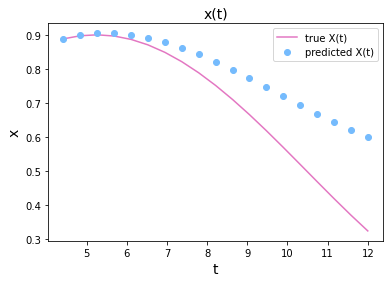

In [21]:
show_predict(net1, t_test, x_test, x)

In [22]:
print('b = ', net1.b, 'W = ', net1.W)

b =  0.027756947012605577 W =  [-0.45793063  0.00793032  0.47388605  0.9325118 ]


### 2. Обучаем нейросеть. 7000 эпох, норма обучения 0.3

epsilon = 0.00010990165043097895


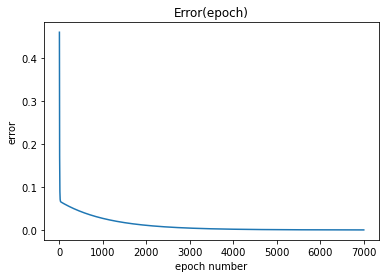

In [23]:
net2 = train_neural_network(X_sliding_windows, X_true, neurons_number=p, epoch_number=7000, lr=0.3)

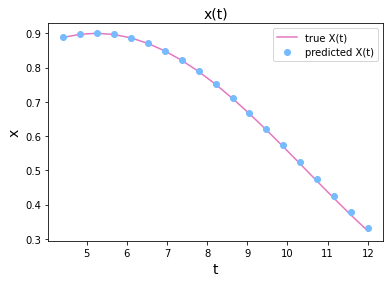

In [24]:
show_predict(net2, t_test, x_test, x)

In [25]:
print('b = ', net2.b, 'W = ', net2.W)

b =  0.020178506365570864 W =  [-0.50191841 -0.00617036  0.48983677  0.97819938]


### 3. Обучаем нейросеть. 7000 эпох, норма обучения 0.1

epsilon = 0.004214804500508958


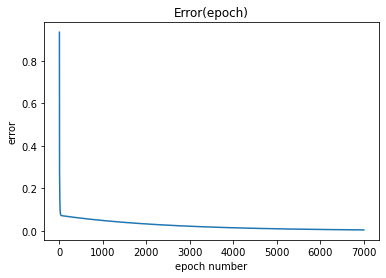

In [26]:
net3 = train_neural_network(X_sliding_windows, X_true, neurons_number=p, epoch_number=7000, lr=0.1)

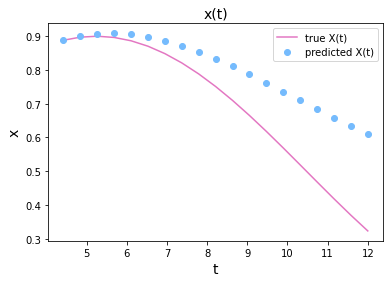

In [27]:
show_predict(net3, t_test, x_test, x)

In [28]:
print('b = ', net3.b, 'W = ', net3.W)

b =  0.0262484340037492 W =  [-0.46134576  0.0072025   0.47584512  0.93711452]


### 4. Обучаем нейросеть. 3000 эпох, норма обучения 0.5

epsilon = 0.002092962939537403


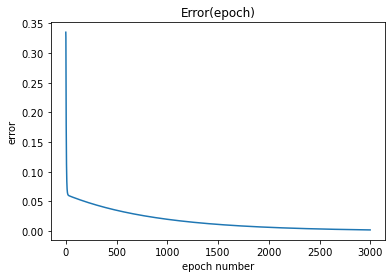

In [29]:
net4 = train_neural_network(X_sliding_windows, X_true, neurons_number=p, epoch_number=3000, lr=0.5)

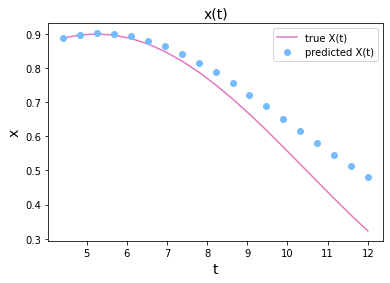

In [30]:
show_predict(net4, t_test, x_test, x)

In [31]:
print('b = ', net4.b, 'W = ', net4.W)

b =  0.024224459381605792 W =  [-0.47935839  0.00100288  0.48154117  0.95459935]


## Теперь рассмотрим размер окна p = 6

In [32]:
p = 6

### Все возможные "скользящие окна"

In [33]:
X_sliding_windows = np.array([[x[j] for j in range(i, i + p)] for i in range(points_number - p)])

In [34]:
X_sliding_windows[0], X_sliding_windows[-1]

(array([0.12718437, 0.14841463, 0.17524722, 0.20725458, 0.24392668,
        0.28467918]),
 array([0.6711373 , 0.71532082, 0.75607332, 0.79274542, 0.82475278,
        0.85158537]))

In [35]:
len(X_sliding_windows)

14

### Правильные ответы для каждого набора иксов

In [36]:
X_true = np.array([x[i] for i in range(p, points_number)])

In [37]:
X_true

array([0.3288627 , 0.3757732 , 0.42466319, 0.47475363, 0.52524637,
       0.57533681, 0.6242268 , 0.6711373 , 0.71532082, 0.75607332,
       0.79274542, 0.82475278, 0.85158537, 0.87281563])

### Обучаем нейросеть. 4000 эпох, норма обучения 0.3

epsilon = 0.00012001553283982967


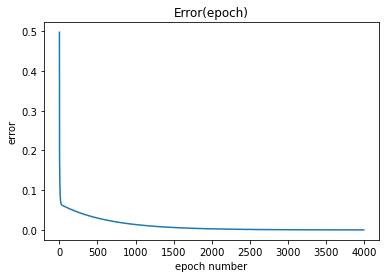

In [38]:
net5 = train_neural_network(X_sliding_windows, X_true, neurons_number=p, epoch_number=4000, lr=0.3)

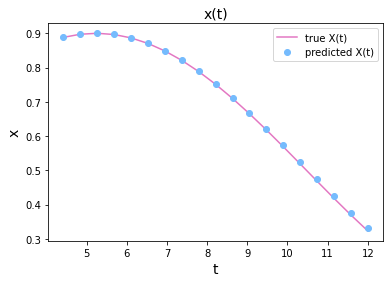

In [39]:
show_predict(net5, t_test, x_test, x)

In [40]:
print('b = ', net5.b, 'W = ', net5.W)

b =  0.0378450312737479 W =  [-0.33751336 -0.14109195  0.0578792   0.2562296   0.45079863  0.63848594]


Для хорошего обучения с lr = 0.3 нам понадобилось всего 4000 эпох, тогда как при p = 4 необходимо было не менее 7000 эпох.

## Теперь рассмотрим размер окна p = 2

In [41]:
p = 2

### Все возможные "скользящие окна"

In [42]:
X_sliding_windows = np.array([[x[j] for j in range(i, i + p)] for i in range(points_number - p)])

In [43]:
X_sliding_windows[0], X_sliding_windows[-1]

(array([0.12718437, 0.14841463]), array([0.82475278, 0.85158537]))

### Правильные ответы для каждого набора иксов

In [44]:
X_true = np.array([x[i] for i in range(p, points_number)])

In [45]:
X_true

array([0.17524722, 0.20725458, 0.24392668, 0.28467918, 0.3288627 ,
       0.3757732 , 0.42466319, 0.47475363, 0.52524637, 0.57533681,
       0.6242268 , 0.6711373 , 0.71532082, 0.75607332, 0.79274542,
       0.82475278, 0.85158537, 0.87281563])

### Обучаем нейросеть. 35000 эпох, норма обучения 0.3

epsilon = 0.00011643936115203302


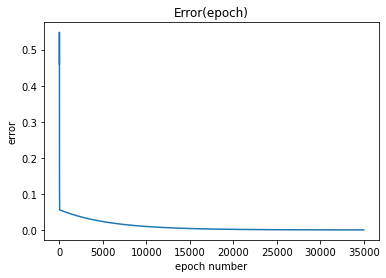

In [46]:
net6 = train_neural_network(X_sliding_windows, X_true, neurons_number=p, epoch_number=35000, lr=0.3)

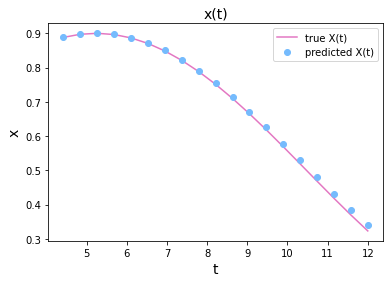

In [47]:
show_predict(net6, t_test, x_test, x)

In [48]:
print('b = ', net6.b, 'W = ', net6.W)

b =  0.00812389277459364 W =  [-0.99697578  1.98095882]


Для хорошего обучения с lr = 0.3 нам понадобилось 35000 эпох, тогда как при p = 4 необходимо было всего 7000 эпох.

### Вывод
При увеличении количества эпох среднеквадратичная погрешность приближения уменьшается.  
При увеличении нормы обучения количество эпох, необходимое для полного обучения, уменьшается. Таким образом, норму обучения можно назвать скоростью обучения. Однако ее нельзя брать слишком большую, потому что иначе точку минимума функции потерь можно "проскакивать".  
При увеличении длины "скользящего окна" количество эпох, необходимое для полного обучения, также уменьшается.